In [1]:
# -*- coding: utf-8 -*-


'''
Nome: Keneth Kendji Yamada
R.A.: 13.00610-0
'''
#Importa as bibliotecas e carrrega o dataset 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("C:/Users/Keneth/Desktop/preco_casa_california.csv")
df.head()





,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
#Mostrar a quantidade de elementos na colune com o seu tipo
#Percebe-se a omissão de alguns dados em Total_bedrooms (20433 ao invés de 20640)


cols = list(df.columns.values)
cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


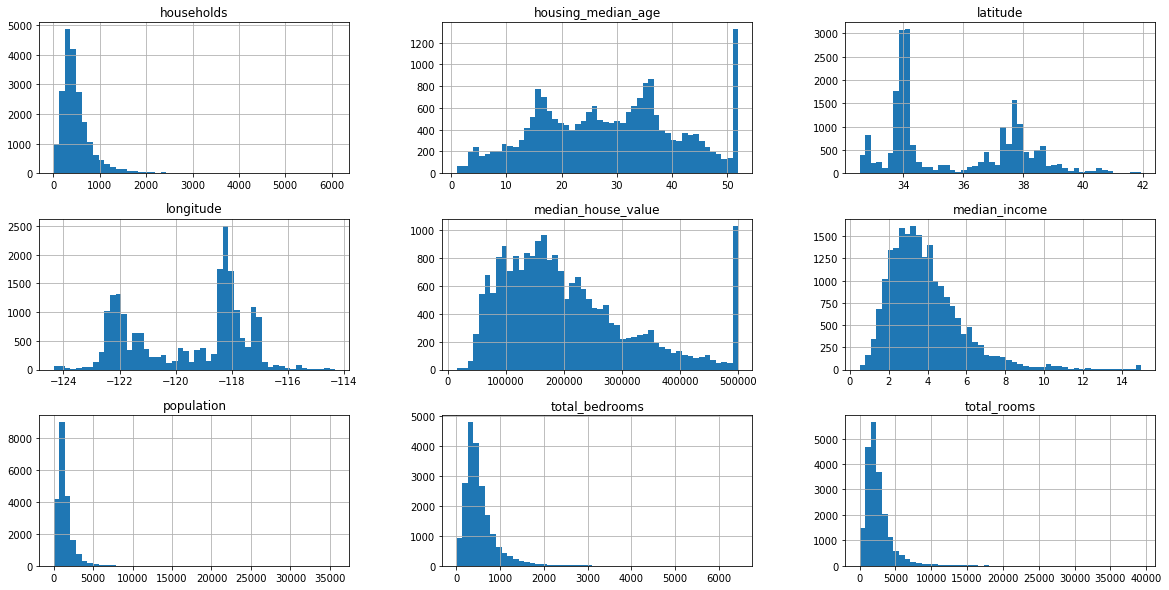

In [3]:
#Plotar os dados armazenados nas colunas em histogramas
df.hist(bins=50,figsize=(20,10))
plt.show()

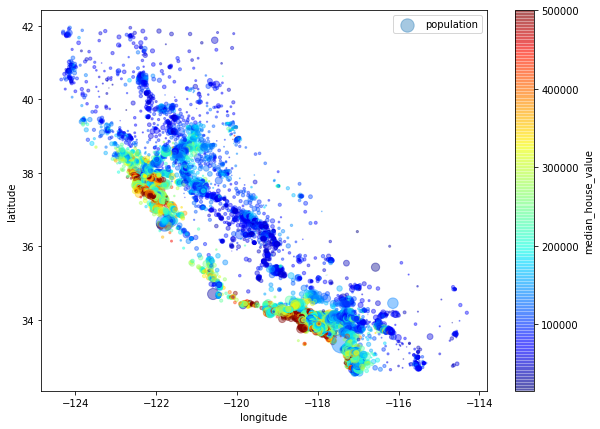

In [4]:
'''Plotar scatter em latitude e longitude, comparando o número de população e, dentro da população, o valor
médio das casas indicados pelos "calor" das cores'''

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244C2257E80>,
      dtype=object)

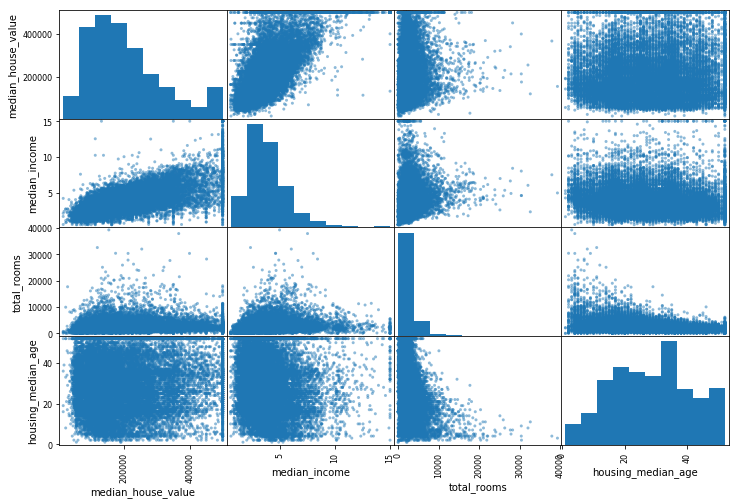

In [5]:
#Procurando correlações com as colunas do dataset
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))




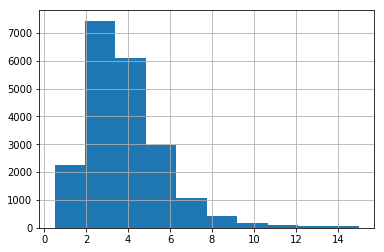

In [6]:
#Início da divisão dos dados de teste e treina

df["median_income"].hist()
df["income_cat"]=np.ceil(df["median_income"]/1.5)
df["income_cat"].where(df["income_cat"]>5,5.0,inplace=True)

In [7]:
#Dados de teste e treina separados
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index,test_index in split.split(df,df["income_cat"]):
    datasettreina=df.loc[train_index]
    dataset_testa=df.loc[test_index]

    

In [8]:
#Informações sobre as colunas de treina e teste
datasettreina.info()


dataset_testa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16659 to 19394
Data columns (total 11 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16346 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 728 to 11550
Data columns (total 11 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4087 non-null float64
population

In [9]:
#Reavaliando os dados que foram omitidos de total_bedrooms
#Mostra infromações sobre os dados

datasettreina["total_bedrooms"].fillna(datasettreina["total_bedrooms"].dropna().mean(), inplace=True)   
datasettreina.info()

dataset_testa["total_bedrooms"].fillna(datasettreina["total_bedrooms"].dropna().mean(), inplace=True)   
dataset_testa.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16659 to 19394
Data columns (total 11 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 728 to 11550
Data columns (total 11 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4128 non-null float64
population

In [10]:
#Algumas relações para serem estabelecidas para os dataset testa
for df in [datasettreina,dataset_testa]:
    df["rooms_per_household"] = df["total_rooms"]/df["households"]
    df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
    df["population_per_household"]=df["population"]/df["households"]
    

In [11]:
#Mostra o dataset_testa
dataset_testa.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
728,-122.11,37.67,36.0,2110.0,389.0,952.0,370.0,3.8000,187500.0,NEAR BAY,5.0,5.702703,0.184360,2.572973
10715,-117.84,33.65,4.0,1649.0,456.0,1030.0,411.0,2.2262,225000.0,<1H OCEAN,5.0,4.012165,0.276531,2.506083
7608,-118.26,33.88,40.0,519.0,102.0,330.0,95.0,3.0972,108500.0,<1H OCEAN,5.0,5.463158,0.196532,3.473684
10180,-117.96,33.87,35.0,1972.0,367.0,1152.0,356.0,3.7222,187500.0,<1H OCEAN,5.0,5.539326,0.186105,3.235955
14565,-117.20,32.84,32.0,2033.0,394.0,989.0,389.0,3.2583,181400.0,NEAR OCEAN,5.0,5.226221,0.193802,2.542416


In [9]:
# Alguns dados "dummies" na coluna ocean_proximity
def missing(df):
    df = pd.get_dummies(df,columns=["ocean_proximity"], drop_first = True)
    return df

datasettreina=missing(datasettreina)
dataset_testa=missing(dataset_testa)



In [10]:
#Mostra o datasettreina
datasettreina.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
16659,-120.67,35.30,32.0,4202.0,986.0,2309.0,956.0,2.2165,231700.0,5.0,4.395397,0.234650,2.415272,0,0,0,1
19735,-121.80,40.34,26.0,4815.0,910.0,1341.0,539.0,2.8810,79800.0,5.0,8.933210,0.188993,2.487941,1,0,0,0
1566,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,350000.0,11.0,22.222222,0.100000,2.777778,0,0,0,0
16430,-121.35,38.09,32.0,1706.0,292.0,923.0,284.0,5.5057,147200.0,5.0,6.007042,0.171161,3.250000,1,0,0,0
9111,-118.15,34.59,33.0,2111.0,429.0,1067.0,397.0,3.7344,111400.0,5.0,5.317380,0.203221,2.687657,1,0,0,0


In [11]:
#Procura nas colunas, algumas correlações
corr_matrix = datasettreina.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.686214
income_cat                    0.391466
ocean_proximity_NEAR BAY      0.166994
rooms_per_household           0.158915
ocean_proximity_NEAR OCEAN    0.138123
total_rooms                   0.132777
housing_median_age            0.104035
households                    0.065741
total_bedrooms                0.049851
ocean_proximity_ISLAND        0.014748
population_per_household     -0.020748
population                   -0.024797
longitude                    -0.050312
latitude                     -0.140169
bedrooms_per_room            -0.213404
ocean_proximity_INLAND       -0.484575
Name: median_house_value, dtype: float64

In [12]:
#Dá um drop nas colunas com menos correlativas
def dropcolum(df):
    df=df.drop(["longitude","latitude","households","total_bedrooms",
                "ocean_proximity_ISLAND","population_per_household","population"], axis=1)
    return df


datasettreina.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 16659 to 19394
Data columns (total 17 columns):
longitude                     16512 non-null float64
latitude                      16512 non-null float64
housing_median_age            16512 non-null float64
total_rooms                   16512 non-null float64
total_bedrooms                16512 non-null float64
population                    16512 non-null float64
households                    16512 non-null float64
median_income                 16512 non-null float64
median_house_value            16512 non-null float64
income_cat                    16512 non-null float64
rooms_per_household           16512 non-null float64
bedrooms_per_room             16512 non-null float64
population_per_household      16512 non-null float64
ocean_proximity_INLAND        16512 non-null uint8
ocean_proximity_ISLAND        16512 non-null uint8
ocean_proximity_NEAR BAY      16512 non-null uint8
ocean_proximity_NEAR OCEAN    16512 non-null 

In [13]:
# Separa os dados x e y de teste e treina
y = datasettreina.iloc[:, 0].values
X = datasettreina.iloc[:, 1:].values

y_testa = dataset_testa.iloc[:, 0].values
X_testa = dataset_testa.iloc[:, 1:].values
# Escalando o dado
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X_testa=sc.transform(X_testa)

In [13]:
#Função para criação de uma tabela para mostrar o resultado do modelo obtido

from sklearn.model_selection import cross_val_score
model_score = pd.DataFrame(columns=["Model","Score","Score Variation"])
def model_score_add(modelname,model):
    scores = cross_val_score(model,X,y,cv=10)
    name=modelname
    score=scores.mean()
    score_std = scores.std()
    model_score.loc[len(model_score)]=[modelname,score,score_std]
    
    

In [14]:
#Utilização do modelo de linearRegression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model_score_add("Linear Regression",lin_reg)


In [15]:
#Mostrar o modelo
model_score

,Model,Score,Score Variation
0,Linear Regression,0.946751,0.003332
